# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [2]:
import pandas as pd

# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr', 
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values 
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [3]:
duplicate_count = data.duplicated().sum()
duplicate_count

300

❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [4]:
data = data.drop_duplicates()

🧪 **Test your code**

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.83s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [6]:
data.isna().sum()/len(data)

GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
RoofSurface     0.006164
GarageFinish    0.055479
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [7]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [8]:
import numpy as np

data['GarageFinish'].replace(np.nan, "NoGarage", inplace=True)
data.GarageFinish.value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [9]:
data.RoofSurface.unique()

array([1995.,  874., 1593., ..., 2645.,  722., 3501.])

In [10]:
data.RoofSurface.isnull().sum()

9

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(data[['RoofSurface']])
data['RoofSurface'] = imputer.transform(data[['RoofSurface']])

data.RoofSurface.isnull().sum()

0

### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
</details>

In [12]:
data.ChimneyStyle.unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [13]:
data.ChimneyStyle.value_counts()

?           1455
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64

In [14]:
data.drop(columns ='ChimneyStyle', inplace=True)
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'GarageFinish', 'CentralAir', 'MoSold', 'SalePrice'],
      dtype='object')

🧪 **Test your code**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.82s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [16]:
data.isna().sum()/len(data)

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## (3) Scaling

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

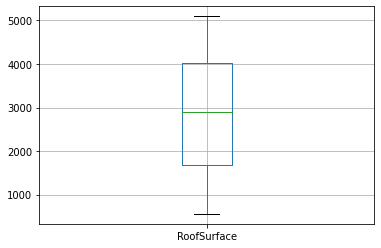

In [17]:
data[['RoofSurface']].boxplot();

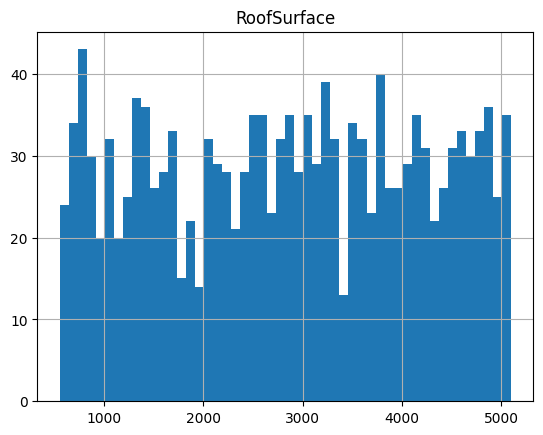

In [18]:
data[['RoofSurface']].hist(bins=50);

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

In [19]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(data[['RoofSurface']])

RoofSurface_mm_scaled = mm_scaler.transform(data[['RoofSurface']])
RoofSurface_mm_scaled

array([[0.31672912],
       [0.06964955],
       [0.22812431],
       ...,
       [0.03614723],
       [0.64866652],
       [0.55631475]])

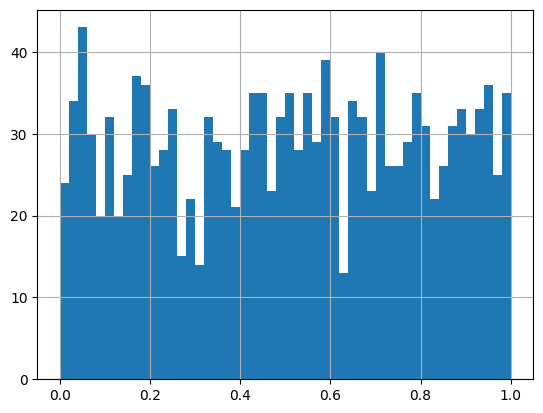

In [20]:
pd.DataFrame(RoofSurface_mm_scaled)[0].hist(bins=50);

In [21]:
data['RoofSurface'] = RoofSurface_mm_scaled
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,0.251267,RFn,Y,8,175000
1456,2073,3,1,6,0.459996,Unf,Y,2,210000
1457,2340,4,1,9,0.036147,RFn,Y,5,266500
1458,1078,2,1,6,0.648667,Unf,Y,4,142125


### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns with the transformed values.

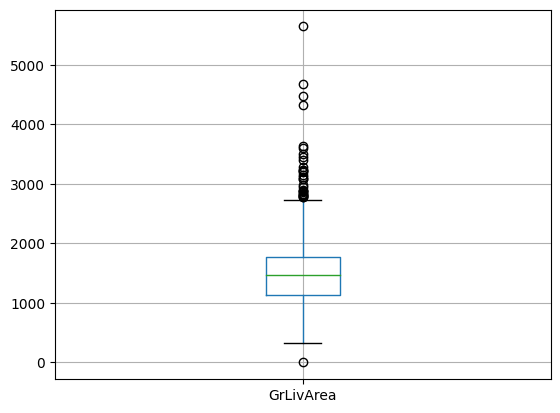

In [22]:
data[['GrLivArea']].boxplot();

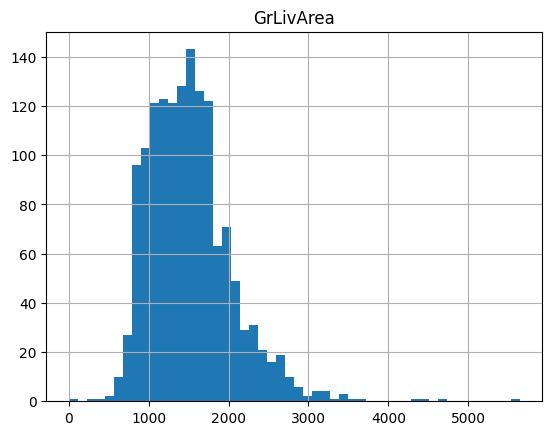

In [23]:
data[['GrLivArea']].hist(bins=50);

In [24]:
data[['GrLivArea']].min()

GrLivArea   -1
dtype: int64

In [25]:
data = data.drop(data.GrLivArea.argmin())
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,0.251267,RFn,Y,8,175000
1456,2073,3,1,6,0.459996,Unf,Y,2,210000
1457,2340,4,1,9,0.036147,RFn,Y,5,266500
1458,1078,2,1,6,0.648667,Unf,Y,4,142125


<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

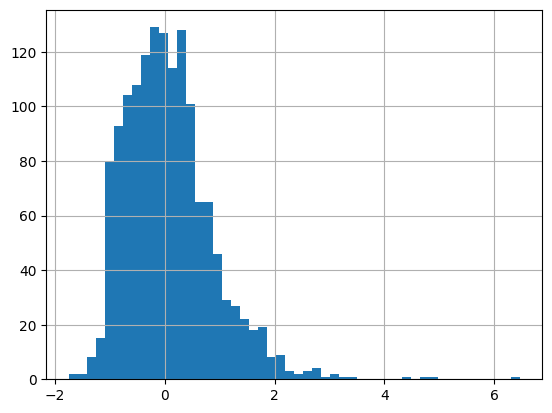

In [26]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
r_scaler.fit(data[['GrLivArea']])

GrLivArea_r_scaled = r_scaler.transform(data[['GrLivArea']])

pd.DataFrame(GrLivArea_r_scaled)[0].hist(bins=50);


In [27]:
data['GrLivArea'] = GrLivArea_r_scaled
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380216,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312210,3,1,8,0.069650,RFn,Y,5,181500
2,0.497682,3,1,5,0.228124,RFn,Y,9,223500
3,0.391036,3,1,5,0.442583,Unf,Y,2,140000
4,1.134467,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282844,3,1,5,0.251267,RFn,Y,8,175000
1456,0.941267,3,1,6,0.459996,Unf,Y,2,210000
1457,1.353941,4,1,9,0.036147,RFn,Y,5,266500
1458,-0.596600,2,1,6,0.648667,Unf,Y,4,142125


### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

In [28]:
data.BedroomAbvGr.unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [29]:
data.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [30]:
data.KitchenAbvGr.unique()

array([1, 2, 3, 0])

In [31]:
feat_mm_scales = ['BedroomAbvGr', 'OverallCond','KitchenAbvGr']

mm_scaler.fit(data[feat_mm_scales])

features_mm_scaled = mm_scaler.transform(data[feat_mm_scales])
features_mm_scaled

array([[0.375     , 0.5       , 0.33333333],
       [0.375     , 0.875     , 0.33333333],
       [0.375     , 0.5       , 0.33333333],
       ...,
       [0.5       , 1.        , 0.33333333],
       [0.25      , 0.625     , 0.33333333],
       [0.375     , 0.625     , 0.33333333]])

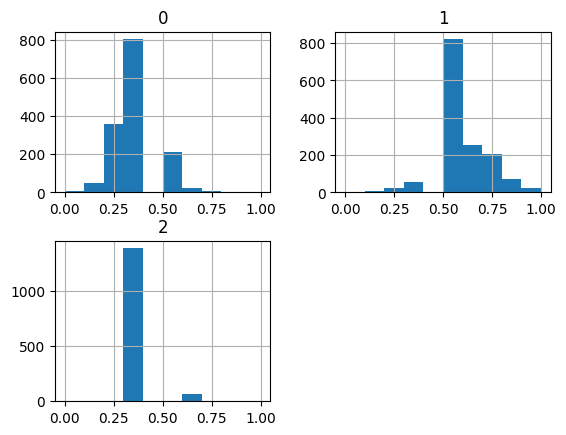

In [32]:
pd.DataFrame(features_mm_scaled).hist();

In [33]:
data[feat_mm_scales] = features_mm_scaled
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380216,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312210,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497682,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.391036,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134467,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282844,0.375,0.333333,0.500,0.251267,RFn,Y,8,175000
1456,0.941267,0.375,0.333333,0.625,0.459996,Unf,Y,2,210000
1457,1.353941,0.500,0.333333,1.000,0.036147,RFn,Y,5,266500
1458,-0.596600,0.250,0.333333,0.625,0.648667,Unf,Y,4,142125


🧪 **Test your code**

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 3 items

test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED      [ 33%]
test_scaling.py::TestScaling::test_gr_liv_area PASSED                    [ 66%]
test_scaling.py::TestScaling::test_roof_surface PASSED                   [100%]

============================== 3 passed in 0.90s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Feature Engineering

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [35]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [36]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data

,GarageFinish,CentralAir
0,RFn,Y
1,RFn,Y
2,RFn,Y
3,Unf,Y
4,RFn,Y
...,...,...
1455,RFn,Y
1456,Unf,Y
1457,RFn,Y
1458,Unf,Y


In [38]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(data[['GarageFinish']])

GarageFinished_ohe = ohe.transform(data[['GarageFinish']])
GarageFinished_ohe.shape

(1459, 4)

In [169]:
data['Fin'], data['NoGarage'], data['RFn'], data['Unf'] = GarageFinished_ohe.T
data.drop(columns=['GarageFinish'], inplace=True)
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380216,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312210,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497682,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,0.0,1.0,0.0
3,0.391036,0.375,0.333333,0.500,0.442583,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134467,0.500,0.333333,0.500,0.566894,Y,12,250000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282844,0.375,0.333333,0.500,0.251267,Y,8,175000,0.0,0.0,1.0,0.0
1456,0.941267,0.375,0.333333,0.625,0.459996,Y,2,210000,0.0,0.0,0.0,1.0
1457,1.353941,0.500,0.333333,1.000,0.036147,Y,5,266500,0.0,0.0,1.0,0.0
1458,-0.596600,0.250,0.333333,0.625,0.648667,Y,4,142125,0.0,0.0,0.0,1.0


### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 Hint</summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [170]:
data.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [171]:
ohe_CA = OneHotEncoder(drop='if_binary', sparse=False)
ohe_CA.fit(data[['CentralAir']])

data['CentralAir'] = ohe_CA.transform(data[['CentralAir']])

data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380216,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312210,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497682,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.391036,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134467,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282844,0.375,0.333333,0.500,0.251267,1.0,8,175000,0.0,0.0,1.0,0.0
1456,0.941267,0.375,0.333333,0.625,0.459996,1.0,2,210000,0.0,0.0,0.0,1.0
1457,1.353941,0.500,0.333333,1.000,0.036147,1.0,5,266500,0.0,0.0,1.0,0.0
1458,-0.596600,0.250,0.333333,0.625,0.648667,1.0,4,142125,0.0,0.0,0.0,1.0


In [172]:
data.CentralAir.value_counts()

1.0    1364
0.0      95
Name: CentralAir, dtype: int64

### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [173]:
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      51
Name: MoSold, dtype: int64

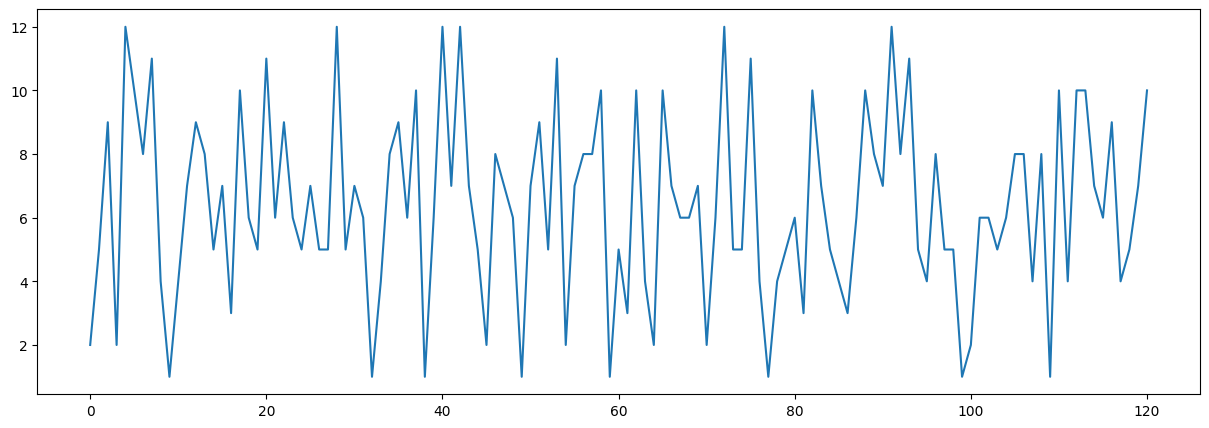

In [174]:
data['MoSold'][:120].plot(figsize=(15, 5));

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical faetures?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://github.com/lewagon/data-images/blob/master/ML/ML_temporal_features.jpg?raw=true" alt="Cyclical features" width="500" height="500">


2. Read this [article](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 Hint</summary>
    
ℹ️ The perimeter of a circle if $C = 2 \pi r = 2 \pi$ and assuming that $ r = 1$
</details>

In [175]:
def cyclical_encoding(df, col, max_val):
    df['sin_' + col] = np.sin(2 * np.pi * df[col]/max_val)
    df['cos_' + col] = np.cos(2 * np.pi * df[col]/max_val)
    return df

data = cyclical_encoding(data, 'MoSold', 12)
data.drop(columns='MoSold', inplace=True)
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380216,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312210,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497682,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.391036,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134467,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282844,0.375,0.333333,0.500,0.251267,1.0,175000,0.0,0.0,1.0,0.0,-8.660254e-01,-5.000000e-01
1456,0.941267,0.375,0.333333,0.625,0.459996,1.0,210000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
1457,1.353941,0.500,0.333333,1.000,0.036147,1.0,266500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
1458,-0.596600,0.250,0.333333,0.625,0.648667,1.0,142125,0.0,0.0,0.0,1.0,8.660254e-01,-5.000000e-01


🧪 **Test your code**

In [176]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_central_air PASSED                  [ 25%]
test_encoding.py::TestEncoding::test_columns PASSED                      [ 50%]
test_encoding.py::TestEncoding::test_month_sold_features PASSED          [ 75%]
test_encoding.py::TestEncoding::test_month_sold_features_number PASSED   [100%]

============================== 4 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [178]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)

print('ok')

ok


🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!